<br>
    
 # Skin Cancer Image Classification Using CNN
    
    Syed Mohib Raza - 200740241
    Jan 27'2021

<br>

<br>

**Table of Content**

1. Abstract
2. Introduction
3. Data Description
4. Data Preprocessing
5. Data Engineering
6. Model Building
    
    Image Augmentation <br>
    Assigning Weights <br>
    Evaluation Metric <br>
    Transfer Learning <br>
    VGG16 <br>
    ResNet50v2
7. Results
8. Personal Reflection

<br>

***

# Abstract

Skin cancer is a serious condition. Different strategies have been developed to distinguish between various forms of skin cancer. Visualizing with clinical screening by dermoscopic analysis can detect it in its early phases. A common goal is to detect a skin lesion automatically. Small blood vessels, a thicker patch, ulceration, and bleeding are all signs of skin cancer. Skin cancer can be spotted using polarised light and a skin magnifier, and it can be diagnosed using a deep learning classifier with data augmentation and weights. The VGG-16 and Resnet50 classifiers are implemented in this report with weights assigned to the classes because of data imbalance between each classes, and the pictures were augmented before training the model to redict 7 different types of cancer clases.

*Keywords - Convolution Neural Network (CNN), Transfer Learning, VGG16, Resnet50, F1-Score, Class Imbalance, Image Augentation*

# Introduction


Much like humans, deep neural networks (DNNs) require extensive training. You can do that by rolling out the latest DNN on a dataset and hope for the best. Or, you can train it to solve a specific problem or identify an object from a novel viewpoint.

Skin cancer is one of the fastest-growing diseases in the world and, the projected rise in skin cancer cases from 2018 - 2040 is 17 million to 26 million [1]. It occurs mainly due to exposure to ultraviolet radiation emitted from the sun. Considering the limited availability of resources, early detection of skin cancer is highly important. 
In recent times, we have witnessed extensive use of deep learning in both supervised and unsupervised learning problems. The current scientific discourse uses Convolutional Neural Networks to address the issues of skin cancer. The current generation of deep learning techniques is capable of successfully detecting and classifying skin cancer images. In this paper, we have proposed a convolutional neural network (CNN) model for skin cancer image classification. The proposed model is capable of classifying 7 different types of skin cancer. The performance of CNN based model can be applied in real-life applications, especially when screening skin cancer.

[1] Wilson, Brooke E; Jacob, Susannah; Yap, Mei Ling; Ferlay, Jacques; Bray, Freddie; Barton, Michael B (2019). Estimates of global chemotherapy demands and corresponding physician workforce requirements for 2018 and 2040: a population-based study. The Lancet Oncology, (), S1470204519301639–. doi:10.1016/S1470-2045(19)30163-9 


# Data description

The HAM10000 training set has 10015 image dermatoscopic image data which were collected over a 20-year period from two separate locations: the Department of Dermatology at the Medical University of Vienna, Austria, and Cliff Rosendahl's skin cancer practice in Queensland, Australia. The 7 classes of skin cancer lesions included in this dataset are:

- Melanocytic nevi (nv)
- Melanoma (mel)
- Benign keratosis-like lesions (bkl)
- Basal cell carcinoma (bcc)
- Actinic keratoses (akiec)
- Vascular lesions (vas)
- Dermatofibroma (df)

With the give image data corresponding meta data is also given which consists of lesion_id,	image_id,	dx (Cancer class),	dx_type,	age (patient age),	sex	and, localization (Area of cancer on the body).

In [ ]:
# Importing Libraries


import numpy as np
import pandas as pd
import os
from numpy import expand_dims
from glob import glob

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For image handling
from PIL import Image

# Setting random seed so as when replicating the process the results are almost similar everytime
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import shutil

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.metrics import PrecisionAtRecall, Recall, CategoricalAccuracy
from tensorflow.keras.metrics import Precision
from keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

In [72]:
import shutil
import itertools
import random

In [93]:
input = "content"
os.listdir(input)

['base_dir',
 'clean_data',
 'consolidated_data',
 'HAM10000_images_part_1',
 'HAM10000_images_part_2',
 'HAM10000_metadata.csv']

**Creating Directories to store the processed images.**

In [6]:
os.mkdir("content/base_dir")

In [11]:
base_dir = "content/base_dir/"

In [12]:
# Setting training directory 
train_dir = os.path.join(base_dir, "train_dir")
# If folder exists it will print out that message
try:
  os.mkdir(train_dir)
except FileExistsError:
  print(f"{train_dir} Already Exists")

# Setting validation directory 
val_dir = os.path.join(base_dir, "val_dir")
# If folder exists it will print out that message
try: 
  os.mkdir(val_dir)
except FileExistsError:
  print(f"{val_dir} Already Exists")

# Setting test directory 
test_dir = os.path.join(base_dir, "test_dir")
# If folder exists it will print out that message
try: 
  os.mkdir(test_dir)
except FileExistsError:
  print(f"{test_dir} Already Exists")

In [13]:
# Creating new folders inside train_dir for each class
# If folder exists it will print out that message for each class

nv = os.path.join(train_dir, 'nv')
try:
  os.mkdir(nv)
except FileExistsError:
  print(f"{nv} Already Exists")

mel = os.path.join(train_dir, 'mel')
try:
  os.mkdir(mel)
except FileExistsError:
  print(f"{mel} Already Exists")

bkl = os.path.join(train_dir, 'bkl')
try:
  os.mkdir(bkl)
except FileExistsError:
  print(f"{bkl} Already Exists")

bcc = os.path.join(train_dir, 'bcc')
try:
  os.mkdir(bcc)
except FileExistsError:
  print(f"{bcc} Already Exists")

akiec = os.path.join(train_dir, 'akiec')
try:
  os.mkdir(akiec)
except FileExistsError:
  print(f"{akiec} Already Exists")

vasc = os.path.join(train_dir, 'vasc')
try:
  os.mkdir(vasc)
except FileExistsError:
  print(f"{vasc} Already Exists")

df = os.path.join(train_dir, 'df')
try:
  os.mkdir(df)
except FileExistsError:
  print(f"{df} Already Exists")

In [14]:
# Creating new folders inside val_dir for each class
# If folder exists it will print out that message for each class

nv = os.path.join(val_dir, 'nv')
try:
  os.mkdir(nv)
except FileExistsError:
  print(f"{nv} Already Exists")

mel = os.path.join(val_dir, 'mel')
try:
  os.mkdir(mel)
except FileExistsError:
  print(f"{mel} Already Exists")

bkl = os.path.join(val_dir, 'bkl')
try:
  os.mkdir(bkl)
except FileExistsError:
  print(f"{bkl} Already Exists")

bcc = os.path.join(val_dir, 'bcc')
try:
  os.mkdir(bcc)
except FileExistsError:
  print(f"{bcc} Already Exists")

akiec = os.path.join(val_dir, 'akiec')
try:
  os.mkdir(akiec)
except FileExistsError:
  print(f"{akiec} Already Exists")

vasc = os.path.join(val_dir, 'vasc')
try:
  os.mkdir(vasc)
except FileExistsError:
  print(f"{vasc} Already Exists")

df = os.path.join(val_dir, 'df')
try:
  os.mkdir(df)
except FileExistsError:
  print(f"{df} Already Exists")

In [15]:
# Creating new folders inside test_dir for each class
# If folder exists it will print out that message for each class

nv = os.path.join(test_dir, 'nv')
try:
  os.mkdir(nv)
except FileExistsError:
  print(f"{nv} Already Exists")

mel = os.path.join(test_dir, 'mel')
try:
  os.mkdir(mel)
except FileExistsError:
  print(f"{mel} Already Exists")

bkl = os.path.join(test_dir, 'bkl')
try:
  os.mkdir(bkl)
except FileExistsError:
  print(f"{bkl} Already Exists")

bcc = os.path.join(test_dir, 'bcc')
try:
  os.mkdir(bcc)
except FileExistsError:
  print(f"{bcc} Already Exists")

akiec = os.path.join(test_dir, 'akiec')
try:
  os.mkdir(akiec)
except FileExistsError:
  print(f"{akiec} Already Exists")

vasc = os.path.join(test_dir, 'vasc')
try:
  os.mkdir(vasc)
except FileExistsError:
  print(f"{vasc} Already Exists")

df = os.path.join(test_dir, 'df')
try:
  os.mkdir(df)
except FileExistsError:
  print(f"{df} Already Exists")

# Data Preprocessing

This section is concentrated on the process of data cleaning and wrangling. To clean and structure the dataset seperate directories are created for each classes for training, testing and validating.
Using the metadata for exploratory data analysis before data engineering.

In [16]:
# Creating dictionary with class keys and full name
cancer_label = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [17]:
# Seperately storing keys for each class
cancer_keys = []
for i in cancer_label.keys():
  cancer_keys.append(i)

# Seperately storing values (names) for each class
cancer_values = []
for j in cancer_label.values():
  cancer_values.append(j)

In [18]:
# Reading metadata from the csv file
metadata_df = pd.read_csv(os.path.join(input, "HAM10000_metadata.csv"))

# Mapping labels/Names of skin cancer classes based on their shortform/keys
metadata_df['dx'] = metadata_df['dx'].map(cancer_label.get)
metadata_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,Benign keratosis-like lesions,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,Benign keratosis-like lesions,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,Benign keratosis-like lesions,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,Benign keratosis-like lesions,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,Benign keratosis-like lesions,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,Actinic keratoses,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,Actinic keratoses,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,Actinic keratoses,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,Actinic keratoses,histo,80.0,male,face


In [19]:
# Finding unique types
metadata_df["dx_type"].unique()

array(['histo', 'consensus', 'confocal', 'follow_up'], dtype=object)

Text(0.5, 1.02, 'Count of People Who Received Tips by Gender')

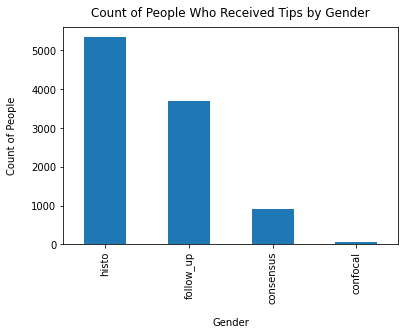

In [20]:
# Plotting the counts for each unique type
metadata_df["dx_type"].value_counts().plot(kind = "bar")
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Count of People Who Received Tips by Gender", y=1.02)

Text(0.5, 1.02, 'Count of each Gender')

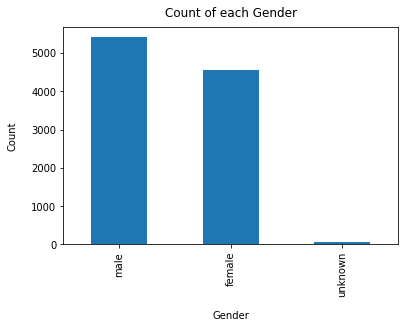

In [21]:
# Plotting count for each sex
metadata_df["sex"].value_counts().plot(kind = "bar")
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Count of each Gender", y=1.02)

Here we can observe that male and female are almost equal in count and if used as a feature, they would not affect the training process but the same could not be said as in the case of cancer classes/types.

Text(0.5, 1.02, 'Count of each cancer class')

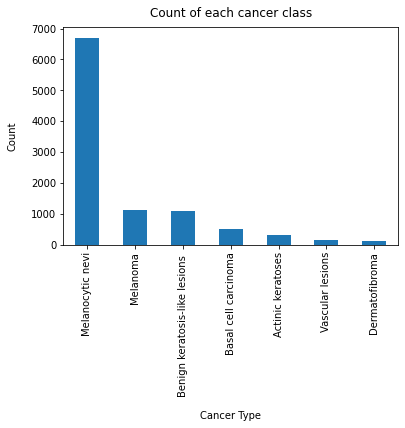

In [22]:
# Plotting data count for each cancer class
metadata_df["dx"].value_counts().plot(kind = "bar")
plt.xlabel("Cancer Type", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Count of each cancer class", y=1.02)

In [23]:
df_id = metadata_df.groupby("lesion_id").count()
df_id

,image_id,dx,dx_type,age,sex,localization
lesion_id,,,,,,
HAM_0000000,2,2,2,2,2,2
HAM_0000001,1,1,1,1,1,1
HAM_0000002,3,3,3,3,3,3
HAM_0000003,1,1,1,1,1,1
HAM_0000004,1,1,1,1,1,1
...,...,...,...,...,...,...
HAM_0007624,1,1,1,1,1,1
HAM_0007625,2,2,2,2,2,2
HAM_0007626,1,1,1,1,1,1


In [24]:
# Printing first few rows for the dataset
metadata_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,Benign keratosis-like lesions,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,Benign keratosis-like lesions,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,Benign keratosis-like lesions,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,Benign keratosis-like lesions,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,Benign keratosis-like lesions,histo,75.0,male,ear


In [25]:
# Storing class count in a dataframe
df = metadata_df["dx"].value_counts().rename_axis('cancer_type').reset_index(name='counts')
print(df)

                      cancer_type  counts
0                Melanocytic nevi    6705
1                        Melanoma    1113
2  Benign keratosis-like lesions     1099
3            Basal cell carcinoma     514
4               Actinic keratoses     327
5                Vascular lesions     142
6                  Dermatofibroma     115


In [26]:
# Finding % for each class in the data
df["Percentage"] = (df["counts"] / len(metadata_df) * 100)
df

,cancer_type,counts,Percentage
0,Melanocytic nevi,6705,66.949576
1,Melanoma,1113,11.113330
2,Benign keratosis-like lesions,1099,10.973540
3,Basal cell carcinoma,514,5.132302
4,Actinic keratoses,327,3.265102
5,Vascular lesions,142,1.417873
6,Dermatofibroma,115,1.148278


Text(0.5, 1.02, 'Percentage of each class in dataset')

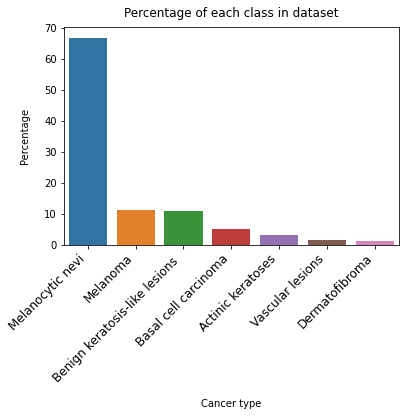

In [27]:
# Plotting % of each skin cancer class
sns.barplot(y = df["Percentage"], x = df["cancer_type"], data = df)
plt.xticks(rotation = 45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.xlabel("Cancer type", labelpad=14)
plt.ylabel("Percentage", labelpad=14)
plt.title("Percentage of each class in dataset", y=1.02)

In a classification challenge, if there are exceptionally few samples for one or more classes out of all the classes to forecast, it may have an imbalanced classes problem in the data. 
The majority of machine learning methods assume that data is distributed uniformly across classes. The extensive difficulty with class imbalance concerns is that the algorithm will be biassed towards anticipating the majority class. The algorithm will be unable to learn the patterns found in the minority class due to a lack of data.

This problem is due to two main reasons:

1. The model/algorithm is not able to properly train on the class with fewer samples and therefore the results are not optimized.
2. With number of observations low for few classes, the representation of each class becomes difficult when dividing the dataset into train, test and validation.

From the above bar plot and the table we can clearly see that a single class (Melanocytic nevi) has significant number of image data (67% of the data) as compared to other classes which would result in the imbalanced data problem. Solution for the above problem can be of various type like image augmentation or assignining weights to the classes. These are discussed during the modelling process.

In [28]:
# Finding na values in the data
metadata_df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [29]:
# Summmary based on age
metadata_df["age"].describe()

count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

Text(0.5, 1.02, 'Age vs Count distribution')

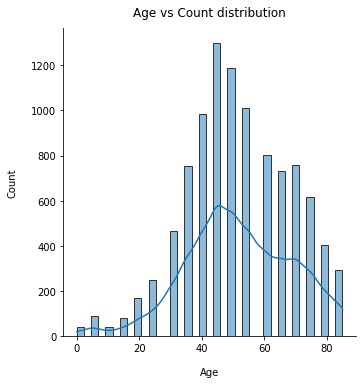

In [30]:
# Plotting age count in data
sns.displot(metadata_df["age"], kde = True)
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Age vs Count distribution", y=1.02)

From the above analysis we find out that age has 57 missing values. To solve this problem we find out the disribution of age across the given data.
From the above and below plots we can clearly see that the age distribution follows a bell shaped curve (normal distribution) therefore we can use the average value to replace the missing data.

C:\Users\Acer\AppData\Local\Temp/ipykernel_6380/713677637.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


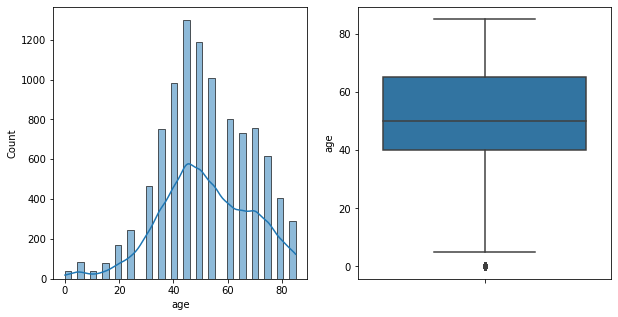

In [31]:
# Plotting age count and age as a box plot
fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.histplot(metadata_df["age"], kde = True, ax=axes[0])
sns.boxplot(y=metadata_df["age"], data=metadata_df, ax=axes[1])

fig.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

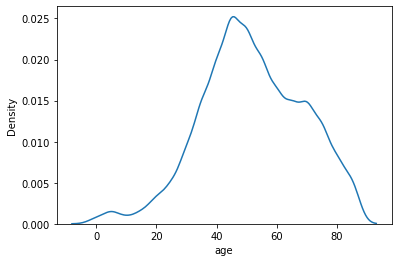

In [32]:
sns.kdeplot(metadata_df["age"])

In [33]:
# Filling na values as the mean of the data
metadata_df['age'].fillna((metadata_df['age'].mean()), inplace=True)
metadata_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,Benign keratosis-like lesions,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,Benign keratosis-like lesions,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,Benign keratosis-like lesions,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,Benign keratosis-like lesions,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,Benign keratosis-like lesions,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,Actinic keratoses,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,Actinic keratoses,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,Actinic keratoses,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,Actinic keratoses,histo,80.0,male,face


# Data Engineering 

Transforming and transporting data to their respective directories for easy implementation of the modeling techniques. Her we are seperating each image into the folders according to their classes after dividing the images in 3 parts, 
- training 80%
- testing 10% and 
- validating images 10%.

Zipped the final data as engineered_data.zip.

**Folder structure of the zip folder**

```
content
  base_dir
    |-train_dir
          |- 7 Folders for each class with their respective images.
    |-test_dir
          |- 7 Folders for each class with their respective images.
    |-val_dir
          |- 7 Folders for each class with their respective images.
```

In [34]:
input

'content'

In [35]:
# Creating a folder for the engineered data
try:
  os.mkdir("content/consolidated_data")
except FileExistsError: 
  print("Folder Already Exists!")

In [42]:
# Setting directory path in variables to move data
src1_dir = "content/ham10000_images_part_1"
src2_dir = "content/ham10000_images_part_2"
dst_dir = "content/consolidated_data"

# Copying images
for images1 in glob(os.path.join(src1_dir, "*.jpg")):
    shutil.copy(images1, dst_dir)

for images2 in glob(os.path.join(src2_dir, "*.jpg")):
  shutil.copy(images2, dst_dir)

In [43]:
# Checking the total number of images
len(os.listdir("content/consolidated_data"))

10015

In [45]:
image_name = []
for i in os.listdir("content/consolidated_data"):
  fname = os.path.splitext(i)
  image_name.append(fname[0])

In [1]:
#image_name

In [ ]:
metadata_df2["dx"].unique()

In [ ]:
labels = [] 
for i in metadata_df2["dx"].unique():
  labels.append(i)
labels

['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']

In [49]:
len(os.listdir("content/consolidated_data"))

10015

In [52]:
import math 
math.floor(101.5)

101

In [53]:
# Dividing data in 80, 10 & 10 percentage for train, test and validate respectively
train_data_length = math.floor(len(os.listdir("content/consolidated_data")) * 0.80)
val_data_length = math.floor(len(os.listdir("content/consolidated_data")) * 0.10)
test_data_length = math.floor(len(os.listdir("content/consolidated_data")) * 0.10)

print(train_data_length, val_data_length, test_data_length)

8012 1001 1001


In [ ]:
# Displaying Percentage of data/images for each class
df_dist = metadata_df2["dx"].value_counts().rename_axis('cancer_type').reset_index(name='counts')
df_dist["Percentage"] = (df_dist["counts"] / len(metadata_df2) * 100)
df_dist

,cancer_type,counts,Percentage
0,nv,6705,66.949576
1,mel,1113,11.113330
2,bkl,1099,10.973540
3,bcc,514,5.132302
4,akiec,327,3.265102
5,vasc,142,1.417873
6,df,115,1.148278


In [ ]:
# DIsplaying the splitted data statistics
df_dist["train_set"] = ((df_dist["Percentage"]/100) * 8012)
df_dist["val_set"] = ((df_dist["Percentage"]/100) * 1001)
df_dist["test_set"] = ((df_dist["Percentage"]/100) * 1001)
df_dist = df_dist.sort_values("cancer_type")
df_dist

,cancer_type,counts,Percentage,train_set,val_set,test_set
4,akiec,327,3.265102,261.6,32.683674,32.683674
3,bcc,514,5.132302,411.2,51.374338,51.374338
2,bkl,1099,10.973540,879.2,109.845132,109.845132
6,df,115,1.148278,92.0,11.494259,11.494259
1,mel,1113,11.113330,890.4,111.244433,111.244433
0,nv,6705,66.949576,5364.0,670.165252,670.165252
5,vasc,142,1.417873,113.6,14.192911,14.192911


In [ ]:
df_dist["Percentage"][6]

1.1482775836245633

In [76]:
labels = sorted(labels)
labels

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [57]:
NEW_DIR = "content/consolidated_data"

In [58]:
# Setting up paths for clean/seperated data
train_dir = "content/base_dir/train_dir/"
val_dir = "content/base_dir/val_dir/"
test_dir = "content/base_dir/test_dir/"

In [59]:
# Dump all images into a folder and specify the path:
data_dir = "content/consolidated_data"

# Path to destination directory where we want subfolders
dest_dir = "content/clean_data/"

# Read the csv file containing image names and corresponding labels
metadata_df2 = pd.read_csv("content/HAM10000_metadata.csv")
print(metadata_df2['dx'].value_counts())

#Extract labels into a list
label = metadata_df2['dx'].unique().tolist()
label_images = []  

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [64]:
try: 
  os.mkdir("content/clean_data")
except FileExistsError:
  print("Folder Already exists")

In [65]:
# Copy images to new folders
for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = metadata_df2[metadata_df2['dx'] == i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir + "/"+ id +".jpg"), (dest_dir + i + "/"+id+".jpg"))
    label_images=[]  

**Dividing the data based on each class into trainning data, test data and validation data.**

In [77]:
#### *************** Training Data ****************** ###
##*** akiec *** ##
source = 'content/clean_data/'+ labels[0]
dest = 'content/base_dir/train_dir/' + labels[0]
files = os.listdir(source)
no_of_files = 261

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** bcc *** ##
source = 'content/clean_data/'+ labels[1]
dest = 'content/base_dir/train_dir/' + labels[1]
files = os.listdir(source)
no_of_files = 411

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** bkl *** ##
source = 'content/clean_data/'+ labels[2]
dest = 'content/base_dir/train_dir/' + labels[2]
files = os.listdir(source)
no_of_files = 879

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** df *** ##
source = 'content/clean_data/'+ labels[3]
dest = 'content/base_dir/train_dir/' + labels[3]
files = os.listdir(source)
no_of_files = 92

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** mel *** ##
source = 'content/clean_data/'+ labels[4]
dest = 'content/base_dir/train_dir/' + labels[4]
files = os.listdir(source)
no_of_files = 890

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** nv *** ##
source = 'content/clean_data/'+ labels[5]
dest = 'content/base_dir/train_dir/' + labels[5]
files = os.listdir(source)
no_of_files = 5364

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** vasc *** ##
source = 'content/clean_data/'+ labels[6]
dest = 'content/base_dir/train_dir/' + labels[6]
files = os.listdir(source)
no_of_files = 113

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

In [78]:
#### *************** Validation Data ****************** ###
##*** akiec *** ##
source = 'content/clean_data/'+ labels[0]
dest = val_dir + labels[0]
files = os.listdir(source)
no_of_files = 32

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** bcc *** ##
source = 'content/clean_data/'+ labels[1]
dest = val_dir + labels[1]
files = os.listdir(source)
no_of_files = 51

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** bkl *** ##
source = 'content/clean_data/'+ labels[2]
dest = val_dir + labels[2]
files = os.listdir(source)
no_of_files = 109

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** df *** ##
source = 'content/clean_data/'+ labels[3]
dest = val_dir + labels[3]
files = os.listdir(source)
no_of_files = 11

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** mel *** ##
source = 'content/clean_data/'+ labels[4]
dest = val_dir + labels[4]
files = os.listdir(source)
no_of_files = 111

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** nv *** ##
source = 'content/clean_data/'+ labels[5]
dest = val_dir + labels[5]
files = os.listdir(source)
no_of_files = 670

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** vasc *** ##
source = 'content/clean_data/'+ labels[6]
dest = val_dir + labels[6]
files = os.listdir(source)
no_of_files = 14

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

In [79]:
#### *************** Test Data ****************** ###
##*** akiec *** ##
source = 'content/clean_data/'+ labels[0]
dest = test_dir + labels[0]
files = os.listdir(source)
no_of_files = 32

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** bcc *** ##
source = 'content/clean_data/'+ labels[1]
dest = test_dir + labels[1]
files = os.listdir(source)
no_of_files = 51

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** bkl *** ##
source = 'content/clean_data/'+ labels[2]
dest = test_dir + labels[2]
files = os.listdir(source)
no_of_files = 109

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** df *** ##
source = 'content/clean_data/'+ labels[3]
dest = test_dir + labels[3]
files = os.listdir(source)
no_of_files = 11

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** mel *** ##
source = 'content/clean_data/'+ labels[4]
dest = test_dir + labels[4]
files = os.listdir(source)
no_of_files = 111

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** nv *** ##
source = 'content/clean_data/'+ labels[5]
dest = test_dir + labels[5]
files = os.listdir(source)
no_of_files = 670

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

##*** vasc *** ##
source = 'content/clean_data/'+ labels[6]
dest = test_dir + labels[6]
files = os.listdir(source)
no_of_files = 14

filelist = glob(os.path.join(dest, "*"))
for f in filelist:
    os.remove(f)

for file_name in random.sample(files, no_of_files):
  shutil.copy(os.path.join(source, file_name), dest)

In [80]:
dest

'content/base_dir/test_dir/vasc'

In [ ]:
fff = df_dist["test_set"].tolist()
fff = np.floor(fff).astype(int)
fff = fff.tolist()
fff

In [82]:
len(os.listdir(dest))

14

In [83]:
!zip -r "content/engineered_data.zip" "content/base_dir"

'zip' is not recognized as an internal or external command,
operable program or batch file.


In [86]:
base_dir = 'content/base_dir'

train_dir = os.path.join(base_dir, 'train_dir')

val_dir = os.path.join(base_dir, 'val_dir')

In [87]:
for fname in os.listdir("content/consolidated_data"):
  fname = os.path.splitext(i)
  image_name.append(fname[0])

# Model Building

In this section we will be building and trainning our models. Before training we will be augmenting our images for better results and will be assigning weights for each class to solve the problem of class imbalance. 

### Image Augmentation 

Image data augmentation is an efficacious technique used artificially to increase the size of the trainning dataset by modifying existing versions of images in the dataset. Trainning DNN's on large data sets will result in more skillfull models.
Keras library in python has the capability to fit models using image augmentation via ImageDataGenerator class.

To modify the images we zoom them, rotate them, shift them, flip them, add noise or blurr to the image etc.

Below we have defined our parameters for image augmentaion on trainning dataset.
- Zoom = 0.2,
- shear = 0.2 and,
- we use pre-processing function to structure data for our model.

In [ ]:
#!unzip "/content/drive/MyDrive/Skin Cancer/engineered_data.zip"

We can remove the comments and see the model performance difference between augmented and unaugmented data. For comparison model performance is saved by tensorflow dashboard. We need to run the dashboard first.

In [ ]:
train_valid_imdatagen = ImageDataGenerator(#shear_range=0.2, zoom_range = 0.2,
                                           #horizontal_flip=True, 
                                           preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input)

test_imdatagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet_v2.preprocess_input)

In [89]:
train_path = "content/base_dir/train_dir"
valid_path = "content/base_dir/val_dir"
test_path = "content/base_dir/test_dir"

In [ ]:
target_size = (224, 224)

train_dataset = train_valid_imdatagen.flow_from_directory(directory=train_path, 
                                                          target_size=target_size,
                                                          color_mode="rgb",
                                                          class_mode = "categorical",
                                                          batch_size=16)

validation_dataset = train_valid_imdatagen.flow_from_directory(directory=valid_path, 
                                                          target_size=target_size,
                                                          color_mode="rgb",
                                                          class_mode = "categorical",
                                                          batch_size=16)

test_dataset = test_imdatagen.flow_from_directory(directory=test_path, 
                                                          target_size=target_size,
                                                          color_mode="rgb",
                                                          class_mode = "categorical",
                                                          batch_size=16)

Found 8010 images belonging to 7 classes.
Found 998 images belonging to 7 classes.
Found 998 images belonging to 7 classes.


### Assigning Weights

In [ ]:
class_type = train_dataset.class_indices
class_type

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', 
                                                  classes = np.unique(train_dataset.classes), 
                                                  y = train_dataset.classes)
class_weights

array([ 4.38423645,  2.78415016,  1.301804  , 12.4378882 ,  1.28571429,
        0.21332694, 10.12642225])

In [ ]:
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 4.384236453201971,
 1: 2.78415015641293,
 2: 1.3018039980497318,
 3: 12.437888198757763,
 4: 1.2857142857142858,
 5: 0.21332694151486098,
 6: 10.126422250316056}

As seen in data preprocessing our classes have unqeual number of images. It is very issential to address this issue. If we don't take measures against it, the results will be biased towards over represented class that is will lean towards the majority class and the model will not be optimal for prediction.

To solve this problem we assign weights to each class within loss function so that the training is more balanced among the classes. To calculate the weights of each class we have use sklearn libraries class_weight. The assigned weights are shown above.

## Evaluation Metric

If we are using accuracy as our only method in clasification to judge our model we can create a dumb model too and still it's accuracy might be good because the model would be biased towrds the majority class.

F1 Score and Accuracy are two measures we frequently use to judge the quality of classification models in machine learning.
The greater the value for both measures, the better a model can categorise data into classes.

Harmonic mean of precision and recall is called as f1 score. It is calculated as follows: 

2(P * R) / P+R<br>
​​
P = the precision<br>
RR = the recall of the classification model

To calculate the F1-score for the entire model you can also to take the arithmetic mean of the F1-scores of all the classes.

In [1]:
from keras import backend as K

def check_units(y_true, y_pred):
    if y_pred.shape[1] != 1:
      y_pred = y_pred[:,1:2]
      y_true = y_true[:,1:2]
    return y_true, y_pred

# Calculating precision
def precision(y_true, y_pred):
    y_true, y_pred = check_units(y_true, y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

# Calculating recall
def recall(y_true, y_pred):
    y_true, y_pred = check_units(y_true, y_pred)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# Calculating f1 metric
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
metric = [tf.keras.metrics.CategoricalAccuracy(name='accuracy'), precision,
          recall, f1_metric]

## Transfer learning

Transfer learning (TL) is a ML research subject that focuses on storing and transferring information learned while addressing one problem to a different but related problem. It is a popular aproach in DL and can save a lot of time by utilising other pre-trained models as the starting point in image classification based on similar data. These pre-trained models were earlier trined on large datasets. It is an optimaztion or shortcut to better performance with less time. It is based on the idea that if a model is trained on a big and general enough dataset, it may successfully serve as a generic model of the visual world.

Here we are using VGG16 & resnet50 model with imagenet weights. In future we can train the remaining layers of our model using other models such as Inception model to acheive better results across the classes.

## VGG16

In the classification of skin malignancies, several CNN models have surpassed qualified human doctors. Several techniques, such as transfer learning using massive datasets, have increased the accuracy of these models even further. VGG-16 is a convolutional neural network built from over a million images in the ImageNet collection. The system has 16 layers and can sort images into 1000 different categories, such as console, mouse, pencil, and various aniamals. As a result, the system has learnt detailed component depictions for a variety of images. The picture information size on the system is 224 by 224 pixels. In ImageNet, a dataset of more than 14 million photos divided into 1000 classes, the model achieves 92.7 percent top-5 test precision [1].

[1] Garg, Rishu, Saumil Maheshwari, and Anupam Shukla. "Decision support system for detection and classification of skin cancer using CNN." In Innovations in Computational Intelligence and Computer Vision, pp. 578-586. Springer, Singapore, 2021.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

def model_vgg16():

  # Using pre-trained model (Trained on imagenet)
  base_model = tf.keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
  
  for layer in base_model.layers:
    layer.trainable = False

  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  output = tf.keras.layers.Dense(7, activation="softmax")(x)
  model = tf.keras.models.Model(inputs = [base_model.input], outputs = [output])

  optim = Adam(learning_rate=0.001)
  
  model.compile(optimizer = optim, loss = "categorical_crossentropy", metrics = metric)

  print(model.summary())

  return model

print("Done")

Done


We are using Adam as the optimizer for our model. It is one of the most extensively used techique because of its simplicity and efficiency for large data volumes.<br>
Categorical cross entropy - It is a loss fucntion for categorizing labels and is used for multi-class classification. Using this we train CNN to output a probability over the classes.

Below we can seen the VGG16 model architecture. We are training the top layers which were randomly initialised.

In [ ]:
model = model_vgg16()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
class_weight_dict

{0: 4.384236453201971,
 1: 2.78415015641293,
 2: 1.3018039980497318,
 3: 12.437888198757763,
 4: 1.2857142857142858,
 5: 0.21332694151486098,
 6: 10.126422250316056}

In [ ]:
# implementing early stopping and model check point 
from keras.callbacks import EarlyStopping, ModelCheckpoint
import datetime, os

# Setting early stopping mechanism monitoring validation accuracy
es = EarlyStopping(monitor= "val_accuracy", mode = "max", min_delta= 0.01, patience = 5, verbose=1)
# If model improves it will automatically save it
mc = ModelCheckpoint(filepath="vgg16.h5", monitor="val_accuracy", verbose=1, save_best_only= True, mode="max")
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# Calling tensorflow dashboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
# Fitting the model on our data and setting up epochs, class weights and other metrics
history_vgg16 = model.fit(train_dataset, epochs = 50, validation_data = validation_dataset, 
                          callbacks = [es, mc, tensorboard_callback], 
                          class_weight = class_weight_dict)

Epoch 1/50
501/501 [==============================] - ETA: 0s - loss: 2.2277 - accuracy: 0.3819
Epoch 00001: val_accuracy improved from -inf to 0.48998, saving model to vgg16.h5
501/501 [==============================] - 169s 337ms/step - loss: 2.2277 - accuracy: 0.3819 - val_loss: 1.3939 - val_accuracy: 0.4900
Epoch 2/50
501/501 [==============================] - ETA: 0s - loss: 1.5535 - accuracy: 0.4720
Epoch 00002: val_accuracy did not improve from 0.48998
501/501 [==============================] - 163s 326ms/step - loss: 1.5535 - accuracy: 0.4720 - val_loss: 1.5396 - val_accuracy: 0.4669
Epoch 3/50
501/501 [==============================] - ETA: 0s - loss: 1.3735 - accuracy: 0.5187
Epoch 00003: val_accuracy improved from 0.48998 to 0.49299, saving model to vgg16.h5
501/501 [==============================] - 165s 329ms/step - loss: 1.3735 - accuracy: 0.5187 - val_loss: 1.4758 - val_accuracy: 0.4930
Epoch 4/50
501/501 [==============================] - ETA: 0s - loss: 1.2561 - accura

In [ ]:
acc = model.evaluate(test_dataset, verbose = 1)
print(f"The accuracy for Test Data using VGG16 model is: {acc[1] * 100} %")

63/63 [==============================] - 12s 162ms/step - loss: 156.5930 - accuracy: 0.6313
The accuracy for Test Data using VGG16 model is: 63.126254081726074 %


Since our classes were imbalanced we assigned weights to the class. Without weights for VGG16 model accuracy received was 70% but the model performance itself was unimpressive with precision and recall near to 0 for most of the classes except the class with large dataset. After implementing the weights the accuracy did decreased to 60% but the model performance was increased with the model predicting more classes although the result was still not satisfactory.

In [ ]:
# Predicting on test data
Y_pred = model.predict(test_dataset)
y_pred = np.argmax(Y_pred, axis = 1)
print("Confusion Matrix")
cf = confusion_matrix(test_dataset.classes, y_pred)
print(cf)

Confusion Matrix
[[  0   3   6   6   7  10   0]
 [  2   0  10   6   4  28   1]
 [  0   0  18  22  16  49   4]
 [  0   1   0   4   4   2   0]
 [  3   2  16  21  15  51   3]
 [ 28  15 117 113  80 300  17]
 [  1   1   3   1   1   7   0]]


In [ ]:
# Matrix with predictions from each class
pd.crosstab(test_dataset.classes, y_pred, rownames = ["Actual"], colnames = ["Predicted"], margins = True)

Predicted,0,1,2,3,4,5,6,All
Actual,,,,,,,,
0,0,3,6,6,7,10,0,32
1,2,0,10,6,4,28,1,51
2,0,0,18,22,16,49,4,109
3,0,1,0,4,4,2,0,11
4,3,2,16,21,15,51,3,111
5,28,15,117,113,80,300,17,670
6,1,1,3,1,1,7,0,14
All,34,22,170,173,127,447,25,998


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


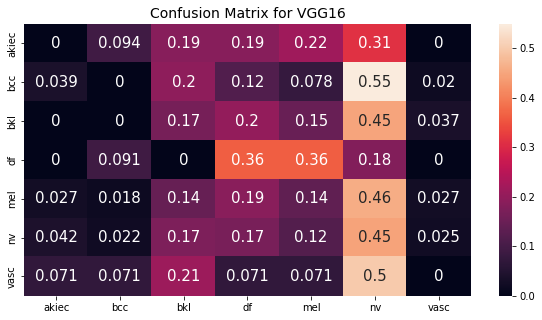

In [ ]:
# Plotting a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = pd.DataFrame(cf, index = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'],
                           columns = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10, 5))
plt.title("Confusion Matrix for VGG16", fontsize = 14)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

The above matrix shows us the performance of the model for each skin cance class.

In [ ]:
from sklearn.metrics import classification_report

target_names = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
print(classification_report(test_dataset.classes, y_pred, target_names = target_names))

              precision    recall  f1-score   support

       akiec       0.00      0.00      0.00        32
         bcc       0.00      0.00      0.00        51
         bkl       0.11      0.17      0.13       109
          df       0.02      0.36      0.04        11
         mel       0.12      0.14      0.13       111
          nv       0.67      0.45      0.54       670
        vasc       0.00      0.00      0.00        14

    accuracy                           0.34       998
   macro avg       0.13      0.16      0.12       998
weighted avg       0.48      0.34      0.39       998



When all classes must be considered equally, we use the macro-averaging score to assess the classifier's overall performance in terms of the most common class labels.

In the event of class imbalances, it is better to use a weighted macro-averaging score (different number of instances related to different class labels).

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

## ResNet 50v2

This is A CNN based 50 layers deep model. We are using a pre-trained version of the ResNet50v2 model which was trained on imagenet database with an image input size of 224 x 224. Model architecture is shown below.<br>
We are using Adam as the optimizer for our model with learning rate of 0.001. It is one of the most extensively used techique because of its simplicity and efficiency for large data volumes.<br>
Categorical cross entropy - It is a loss fucntion for categorizing labels and is used for multi-class classification. Using this we train CNN to output a probability over the classes.

In [ ]:
def model_resnet50():

  # Using pre-trained model (Trained on imagenet)
  base_model = tf.keras.applications.ResNet50V2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
  
  x = base_model.output
  x = GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Dense(128, activation = "relu")(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  output = tf.keras.layers.Dense(7, activation="softmax")(x)
  model = tf.keras.models.Model(inputs = [base_model.input], outputs = [output])

  for layer in base_model.layers:
    layer.trainable = False

  optim = Adam(learning_rate=0.001)
  
  model.compile(optimizer = optim, loss = "categorical_crossentropy", metrics = metric)

  print(model.summary())

  return model

print("Done")

Done


In [ ]:
# Model architecture
model = model_resnet50()

In [ ]:
# implementing early stopping and model check point 
from keras.callbacks import EarlyStopping, ModelCheckpoint
import datetime, os

# Setting early stopping mechanism monitoring validation accuracy
es = EarlyStopping(monitor= "val_f1_metric", mode = "max", min_delta= 0.01, patience = 5, verbose=1)
# Saving the improvements in the model
mc = ModelCheckpoint(filepath="renset50v2.h5", monitor="val_f1_metric", verbose=1, save_best_only= True, mode="max")
# Reducing learning rate if the model is not improving
lr_r = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_f1_metric', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [ ]:
# Fitting the model on our dataset
history_resnet50 = model.fit(train_dataset, epochs = 50, validation_data = validation_dataset, 
                          callbacks = [es, mc, lr_r, tensorboard_callback], 
                          class_weight = class_weight_dict, batch_size = 16)

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/50
501/501 [==============================] - ETA: 0s - loss: 1.5005 - accuracy: 0.3765 - precision: 0.1228 - recall: 0.1209 - f1_metric: 0.3605
Epoch 00001: val_f1_metric improved from -inf to 0.47474, saving model to renset50v2.h5
501/501 [==============================] - 95s 184ms/step - loss: 1.5005 - accuracy: 0.3765 - precision: 0.1228 - recall: 0.1209 - f1_metric: 0.3605 - val_loss: 1.2066 - val_accuracy: 0.5341 - val_precision: 0.1111 - val_recall: 0.0754 - val_f1_metric: 0.4747 - lr: 0.0010
Epoch 2/50
501/501 [==============================] - ETA: 0s - loss: 1.1352 - accuracy: 0.5687 - precision: 0.2142 - recall: 0.2158 - f1_metric: 0.5237
Epoch 00002: val_f1_metric improved from 0.47474 to 0.51957, saving model to renset50v2.h5
501/501 [==============================] - 91s 181ms/step - loss: 1.1352 - accuracy: 0.5687 - precision: 0.2142 - recall: 0.2158 - f1_metric: 0.5237 - val_loss: 1.0421 - val_accuracy: 0.5721 - val_precision: 0.2381 - val_recall: 0.2050 - val_

In [ ]:
acc = model.evaluate(test_dataset, verbose = 1)
print(f"The accuracy for Test Data using ResNet50 V2 model is: {acc[1] * 100} %")

63/63 [==============================] - 12s 184ms/step - loss: 0.3922 - accuracy: 0.8697 - precision: 0.5357 - recall: 0.5476 - f1_metric: 0.8642
The accuracy for Test Data using ResNet50 V2 model is: 86.97394728660583 %


In [ ]:
Y_pred = model.predict(test_dataset)
y_pred = np.argmax(Y_pred, axis = 1)
print("Confusion Matrix")
cf = confusion_matrix(test_dataset.classes, y_pred)
print(cf)

Confusion Matrix
[[  1   1   3   0   5  20   2]
 [  3   4   7   2   9  26   0]
 [  5   3  15   0  12  73   1]
 [  0   1   0   0   4   6   0]
 [  4   8  24   0  13  61   1]
 [ 24  39  77  10 110 395  15]
 [  1   0   1   0   2  10   0]]


In [ ]:
pd.crosstab(test_dataset.classes, y_pred, rownames = ["Actual"], colnames = ["Predicted"], margins = True)

Predicted,0,1,2,3,4,5,6,All
Actual,,,,,,,,
0,1,1,3,0,5,20,2,32
1,3,4,7,2,9,26,0,51
2,5,3,15,0,12,73,1,109
3,0,1,0,0,4,6,0,11
4,4,8,24,0,13,61,1,111
5,24,39,77,10,110,395,15,670
6,1,0,1,0,2,10,0,14
All,38,56,127,12,155,591,19,998


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


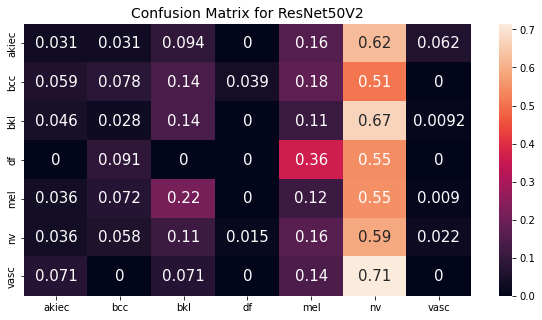

In [ ]:
# Plotting confuion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = pd.DataFrame(cf, index = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'],
                           columns = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (10, 5))
plt.title("Confusion Matrix for ResNet50V2", fontsize = 14)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

| Metrics               | Resnet50 (Without IMG Augmentation) |
|-----------------------|-------------------------------------|
| Accuracy              | 85.19%                              |
| Accuracy (Test data)  | 86.97%                              |
| Validation Accuracy   | 86.37%                              |
| F1 metric             | 85.19                               |
| Validation F1         | 85.75                               |
| F1 metric (Test data) | 86.42%                              |


In [ ]:
from sklearn.metrics import classification_report

target_names = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
print(classification_report(test_dataset.classes, y_pred, target_names = target_names))

              precision    recall  f1-score   support

       akiec       0.03      0.03      0.03        32
         bcc       0.07      0.08      0.07        51
         bkl       0.12      0.14      0.13       109
          df       0.00      0.00      0.00        11
         mel       0.08      0.12      0.10       111
          nv       0.67      0.59      0.63       670
        vasc       0.00      0.00      0.00        14

    accuracy                           0.43       998
   macro avg       0.14      0.14      0.14       998
weighted avg       0.48      0.43      0.45       998



Above is the metric score for different skin cancer classes in the dataset. we can see that the model is not predicting 'df' and 'vasc' classes at all. This is because we observed earlier during data analysis that these two classes have the lowest count of images in the dataset whereas nv has the highest therefore is has good metric scores.

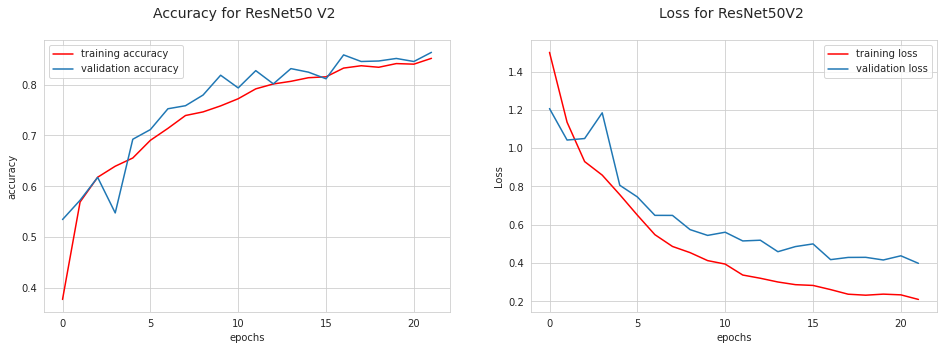

In [ ]:
fig = plt.figure(figsize=(16, 5))
#  subplot #1
plt.subplot(121)
import seaborn as sns 
sns.set_style("whitegrid")
plt.plot(history_resnet50.history["accuracy"], 'r', label = "training accuracy")
plt.plot(history_resnet50.history["val_accuracy"], label = "validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy for ResNet50 V2 \n", fontsize = 14)
plt.legend()

#  subplot #2
plt.subplot(122)
import seaborn as sns 
sns.set_style("whitegrid")
plt.plot(history_resnet50.history["loss"], 'r', label = "training loss")
plt.plot(history_resnet50.history["val_loss"], label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Loss for ResNet50V2 \n", fontsize = 14)
plt.legend()

plt.show()

The plot for the accuracy and loss obtained
during the training and testing process is shown above.

# Results

Sticking to better accuracy can create illusion of model performing well whilst it is better to have balance between the metric's which justify our use case.

The models created were trained by using the skin cancer HAM10000 image
dataset from kagle. The number of epoch were 50. Confusion matrix are displayed at the end of each model along with other performanc metrics.<br>

From the table we can see the f1-scores of the respective classes and can notice that the models with image augmentation implemented can predict more classes, even if the overall accuracy of the model was reduced, f1-score for majority of classes were increased. In terms of accuracy without image augmentation, ResNet50v2 had the highest accuracy (85%) with 86% validation accuracy. This was reduced to 74% with image augmentation.<br>
Just like augmentation removing pre-assigned weights led to significant increase in the accuracy but the model performance was heavily biased towards the majority class.

VGG16 had the best accuracy of 60% with image augmentation not applied, with its application it was reduced to 54%. Overall ResNet50 has a better score metric. However, there were no promising results in these learning algorithm.

|                    | Resnet50 (Img Augmented) | Resnet50 (Without Augmentation) | VGG16 (Img Augmented) | VGG16 (Without Augmentation) |
|--------------------|--------------------------|---------------------------------|-----------------------|------------------------------|
| **Cancer Classes** |                          | **f1-scores**                   |                       |                              |
| akiec              | 0.00                     | 0.03                            | 0.01                  | 0.00                         |
| bcc                | 0.07                     | 0.07                            | 0.10                  | 0.00                         |
| bkl                | 0.17                     | 0.13                            | 0.04                  | 0.13                         |
| df                 | 0.12                     | 0.00                            | 0.02                  | 0.04                         |
| mel                | 0.14                     | 0.10                            | 0.14                  | 0.13                         |
| nv                 | 0.59                     | 0.63                            | 0.49                  | 0.54                         |
| vasc               | 0.05                     | 0.00                            | 0.00                  | 0.00                         |

# Future Scope

Encouraged by these outcomes, future work will include the improvement of prediction result and classification accuracy.
The dataset was highly imbalance in future image augmentation can be used to create a seperate dataset and then train the model. Learning rate reduction can be introduced for better and fine tunnning the algorithm. After trainning the top layer we can use othe models to train the remaining layers or implementing a bilinear approach composed by the ResNet50 and the VGG16 architectures will be great.

# Personal Reflection

The project taught me how to use a variety of tools and improved my understanding of analyzing a system's performance. It has improved my understanding of handling data and data preparations along with data engineering. I have also learned various analytical techniques to perform data analysis and get relevant insights using the Python language and use it to handle corrupt/missing data. I was able to utilize tensorflow dashboard during the project. I have used google colab as a literate programming framework along with other popular libraries like Pandas (for data processing), matplotlib, and seaborn (for data visualization) keras and tensorflow for implementing deep learning models, along with GitHub and google colab history for version control, all of which has helped me hone my skills in using these tools. The assignment also helped me to hone my report writing and data science project management abilities.